<a href="https://colab.research.google.com/github/Rio-HEPLab/ML4Physics/blob/PPGF-2025-1/07-Ensemble_Learning_and_Random_Forests_conGraficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" width= 120 style="padding-right:10px;" src="https://covers.oreillystatic.com/images/0636920052289/lrg.jpg">

*Essa aula é inteiramente baseada no **capítulo 7** do livro [Hands-On Machine Learning with Scikit-Learn & TensorFlow](http://shop.oreilly.com/product/0636920052289.do) por Aurélien Geron; os notebooks do livro estão disponíveis [no GitHub](https://github.com/ageron/handson-ml).*

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*Alguns exemplos foram tirados do livro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) por Jake VanderPlas; disponível [no GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*


# Random Forests


*   Resumo de `Decision Trees`
   * Resolução dos exercícios


1.   Voting Classifiers - classificadores por votação
2.   Bagging and Pasting - diferentes formas de organizar as subamostras
3.   Random Patches and Random Subspaces
4.   Random Forests - a floresta aleatória
5.   Boosting
6.   Stacking
7.   Exercícios

## Resumo de Decision Trees
Na aula passada vimos que as `Decision Trees` (árvores de decisão) são um tipo de algoritmo de ML **Supervisionado** e são usadas para **classificar** e **estimar**.

São bastante sensíveis aos hyperparâmetros. Ao usarmos uma `Decision Tree`, devemos escolher com cuidado os parâmetros de input do nosso Estimador/Classificador.


## Ensemble Learning e Random Forests

**Ensemble learning**: método onde se usa a informação **agregada** de um conjunto (*ensemble*) de estimadores (classificadores ou métodos de regressão) para se obter uma estimativa.


\\
**Random Forests**:
* treinar um grupo de `Decision Trees` em subconjuntos (aleatórios distintos) do conjunto de treinamento;
* para fazer predições, obtém-se a predição de cada `Decision Tree` individualmente;
* a predição final é o valor que ocorre com mais frequência.

### Voting Classifiers
(Clasificadores por votação)

![hard voting](https://i.stack.imgur.com/W7UmY.png)


Criação e treinamento de um 'voting classifier' usando 'scikit-learn':

In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

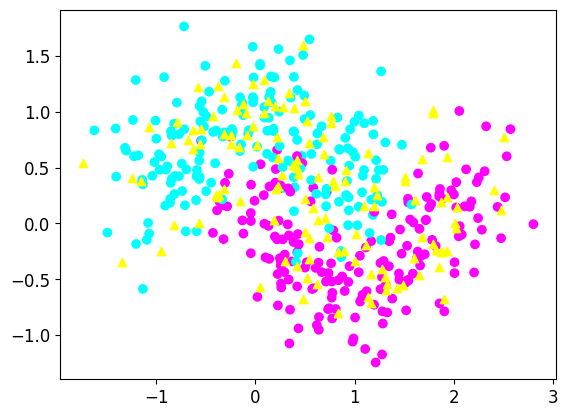

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap="cool")
plt.scatter(X_test[:,0],X_test[:,1],color="yellow", marker="^")

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard') # estimators : list of (string, estimator) tuples

In [4]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [5]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)




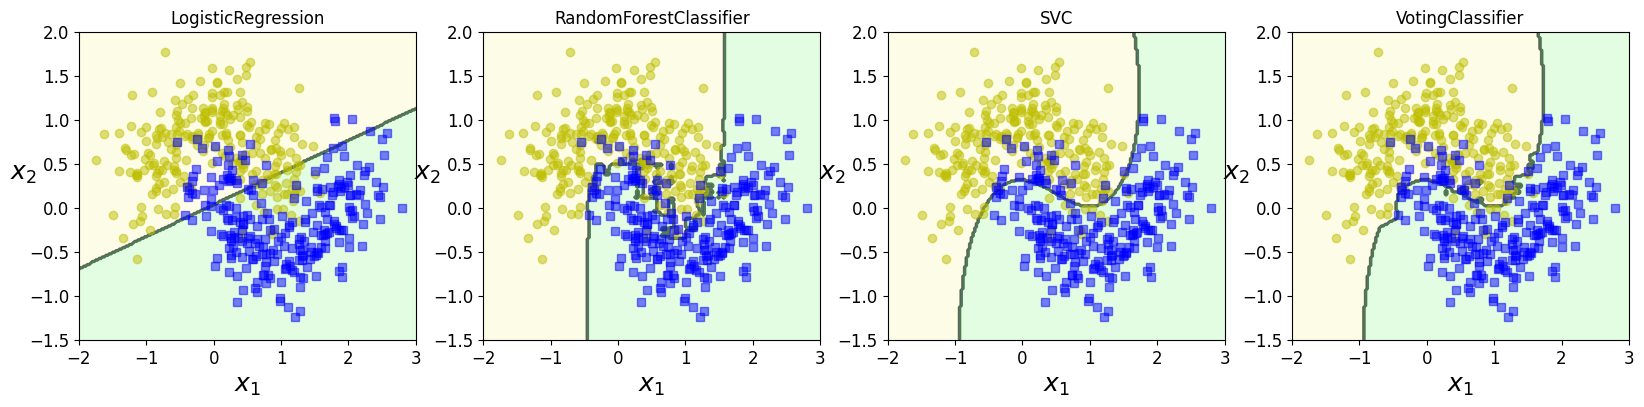

In [7]:
plt.figure(figsize=(20,4))

for i,clf in enumerate((log_clf, rnd_clf, svm_clf, voting_clf)):
    plt.subplot(int(141+i))
    plot_decision_boundary(clf,X,y,axes=[-2,3,-1.5,2])
    plt.title(str(clf.__class__.__name__))


No exemplo acima, o 'Voting Classifier' obteve uma acurácia maior que as dos outros classificadores considerados individualmente.

obs.:  Quanto mais independentes os classificadores usados no 'Ensemble Learning', melhor a performance.

Podemos também considerar as probabilidades de classificação, considerando que os classificadores têm o método 'predict_proba()' e decidir pelo classificador com a maior média das probabilidades.

In [8]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42) # temos que forçar o SVC a calcular a probabilidade

voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [9]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


Text(0.5, 1.0, 'VotingClassifier Hard')

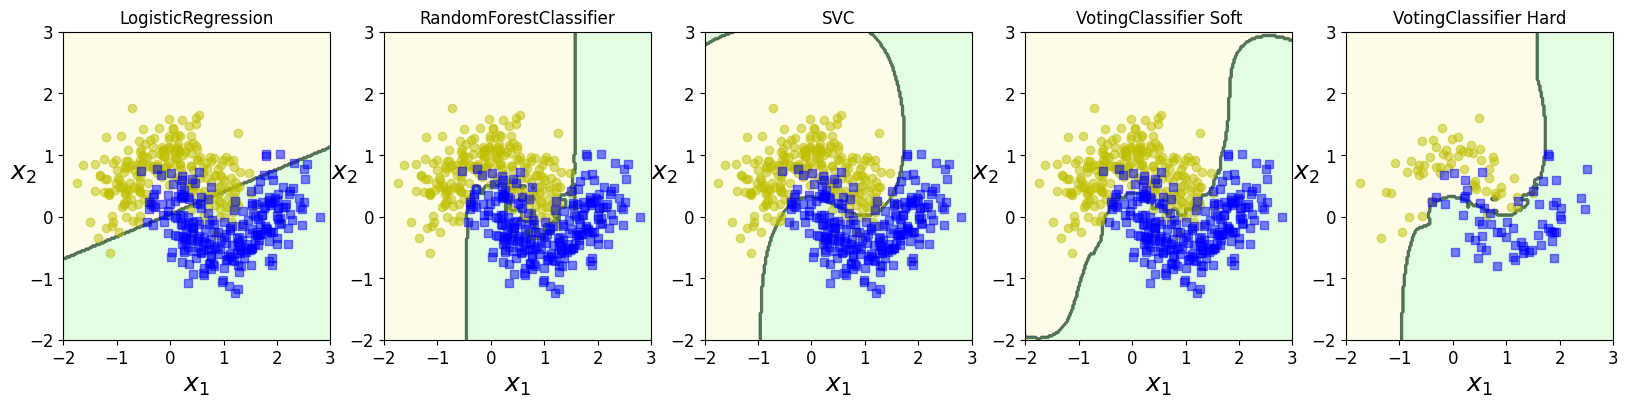

In [10]:
plt.figure(figsize=(20,4))


for i,clf in enumerate([log_clf, rnd_clf, svm_clf]):
    plt.subplot(int(151+i))
    plot_decision_boundary(clf,X,y,axes=[-2,3,-2,3])
    plt.title(str(clf.__class__.__name__))
plt.subplot(154)
plot_decision_boundary(voting_clf_soft,X,y,axes=[-2,3,-2,3])
plt.title(str(voting_clf_soft.__class__.__name__)+" Soft")
plt.subplot(155)
plot_decision_boundary(voting_clf,X_test,y_test,axes=[-2,3,-2,3])
plt.title(str(voting_clf_soft.__class__.__name__)+" Hard")

### Bagging and Pasting

**Bagging**: **B**ootstrap **aggr**egat**ing** ==> amostragem com substituição (*sampling with replacement*): seleção de uma sub-amostra escolhida aleatoriamente de uma amostra, podendo haver **reutilização de valores**. Quer dizer que em uma sub-amostra para treinamento pode se repetir o mesmo ponto dos dados 0, 1 ou mais vezes.

**Pasting**: amostragem **sem reutilização de valores**. Ou seja cada ponto dos dados pode aparecer numa sub-amostra no máximo 1 vez, mas pode aparecer em mais de uma sub-amostra.

![bagging](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*iskng0M2Qv9GF0CADcl0Ww.png)

A função de agregação é em geral o `hard voting` para classificadores e a média das probabilidades para a regressão.

#### Bagging ensembles

Um classificador `bagging` com o `scikit-learn`:

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42)
bag_clf.fit(X_train, y_train)



BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [12]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.904


Um classificador de `Decision Tree`

In [13]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))



0.856


Abaixo comparamos os limites de decisão da `Decision Tree` com o `Bagging` usando o conjunto de dados `moon's dataset`.

O método de ensemble generaliza melhor os dados do que uma única `Decision Tree`.

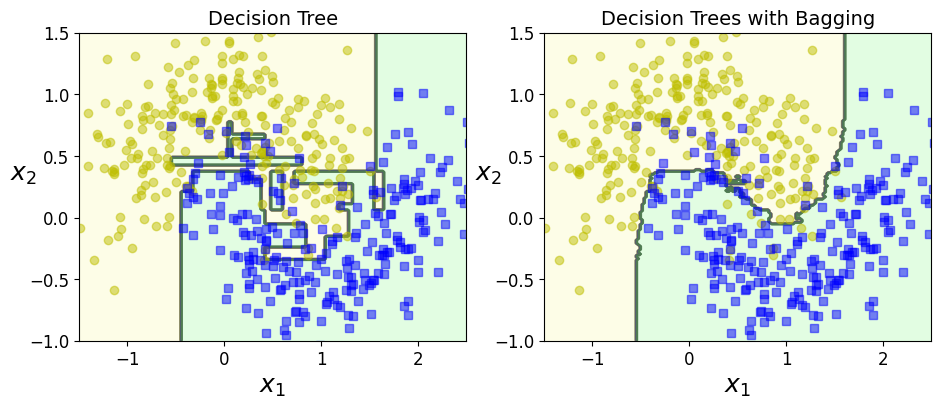

In [14]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

#### **Exercício**:
Faça a representação gráfica dos limites de decisão de uma `Decision Tree`, do método de `Bagging` e do método de **`Pasting`** com 500 `Decision Trees` treinadas em amostras aleatórias de 100 instâncias cada, usando a mesma amostra do `moon's dataset`.

### Random Patches e Random Subspaces

O Classificador `Bagging` também permite que se faça a amostragem nas `features` também (além das instâncias).

> **Método `Random Patch`**: amostragem das instâncias e `features`;

> **Método de `Random Subspaces`**: amostragem somente nas `features`.


## Random Forests

Podemos usar o método `RandomForestClassifier` do `scikit-learn` para uso das Random Forests.

O algoritmo `RandomForestClassifier` introduz uma aleatoriedade ainda maior ao ***crescer árvores***: ao invés de escolher a melhor `feature` para o limite de decisão das `Decision Trees` da "floresta", ele escolhe a melhor `feature` de um subconjunto de `features`, escolhido aleatoriamente.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.912


Podemos escrever um método de `Bagging` para produzir um `RandomForestCalssifier`:

In [16]:
bag_clf_boots = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf_boots.fit(X_train, y_train)

y_pred_bc = bag_clf_boots.predict(X_test)

print(accuracy_score(y_test, y_pred_bc))

0.92


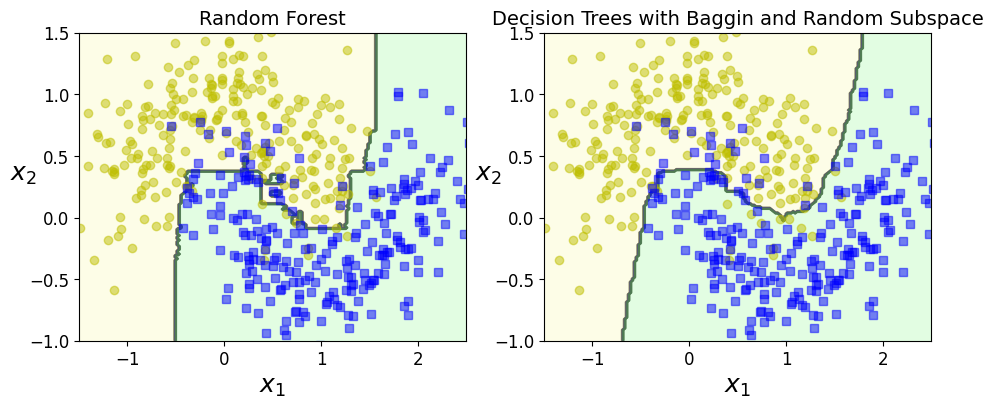

In [17]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf_boots, X, y)
plt.title("Decision Trees with Baggin and Random Subspace" , fontsize=14)


plt.show()

### ExtRa Trees

É possível introduzir ainda mais aleatoriedade ao método de `Random Forests`, estabelecendo os limiares (`thresholds`) dos atributos (`features`) de forma aleatória (ao invés de procurar pelo melhor `threshold`) ==> **Extremely Randomized Trees ensemble**

`ExtraTreesClassifier` e `ExtraTreesRegressor` estão disponíveis no `scikit-learn`.

$\boxed{\text{Em geral é difícil dizer a priori qual o melhor método a se usar. O ideal é testar ambos e e comparar suas performances.} }$

## **Boosting**

_Boosting_ é uma técnica geral que se refere a qualquer método de ensemble em que a ***combinação de estimadores/classificadores fracos individualmente, resulta em um método forte***.

***Boosting***: neste contexto, quer dizer treinar estimadores **sequencialmente**, cada um tentando corrigir e melhorar o seu antecessor.

Dica: Assista a
[aula de Boosting do MIT Open Courseware](https://youtu.be/UHBmv7qCey4?si=x_UwxDcb9pG1s9Nj). Boosting funciona com qualquer classificador, não só árvores ou _stumps_ de árvores.

### AdaBoosting

("Ada" de adaptar)

Uma forma de fazer o novo estimador corrigir o antecessor é olhando para os casos de "underfitting". O resultado são novos estimadores que focam mais e mais nos casos difíceis.

Por exemplo:

1. Temos uma `Decision Tree` que classificou erroneamente algumas instâncias de treinamento;
2. O peso relativo das instâncias mal classificadas é aumentado e passado para o estimador sucessor;
3. O segundo classificador é treinado com esses pesos, faz predições e atualiza os pesos, que são passados para o quarto classificador e assim por diante.

![adaboosting](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*dhrecywXzYS5QvuRq79xYw.png)

A seguir, treinamos um classificador `AdaBoost` baseado em 200 `Decision Stumps` (que é uma `Decision Tree` com `max_depth=1`).

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [19]:
y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))

0.896


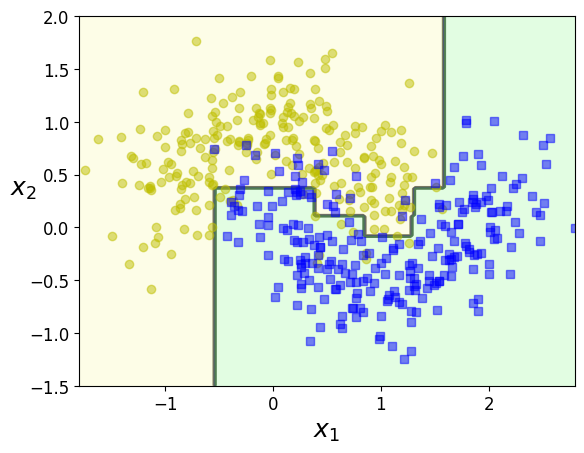

In [20]:
plot_decision_boundary(ada_clf, X, y,axes=[-1.8,2.8,-1.5,2.0])

Se o `AdaBoosting` estiver fazendo overfitting e "decorando" a amostra de treinamento, pode-se ajustar os hyperparâmetros `n_estimators`, `learning_rate`, ou tentar ***regularizar*** os estimadores base.






### Gradient Boosting

Assim como o `AdaBoosting`, o `Gradient Boosting` trabalha com estimadores sequenciais, cada um corrigindo o seu antecessor.

Mas ao invés de aplicar pesos para corrigir o estimador antecessor, o `Gradient Boosting` tenta ajustar o novo estimador aos **erros residuais** do antecessor e assim corrigir a estimativa anterior.

Vamos ver um exemplo de um estimador para a regressão de uma função quadrática com ruído (exemplo da semana passada).

In [21]:
def quadratic_plus_noise(m = 100):
  """Quadratic training set + noise
    m: number of samples
  """
  np.random.seed(42)
  X = np.random.rand(m, 1) - 0.5
  y = 3*X[:, 0]**2 + 0.05 * np.random.randn(m)
  return X, y

X, y = quadratic_plus_noise()

O primeiro estimador é uma `Decision Tree`. Vamos fazer a predição e olhar para os resíduos:

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)



DecisionTreeRegressor(max_depth=2, random_state=42)

In [23]:
x_test_reg = np.linspace(-0.5, 0.5, 500)
y_pred=tree_reg1.predict(x_test_reg.reshape(-1,1))

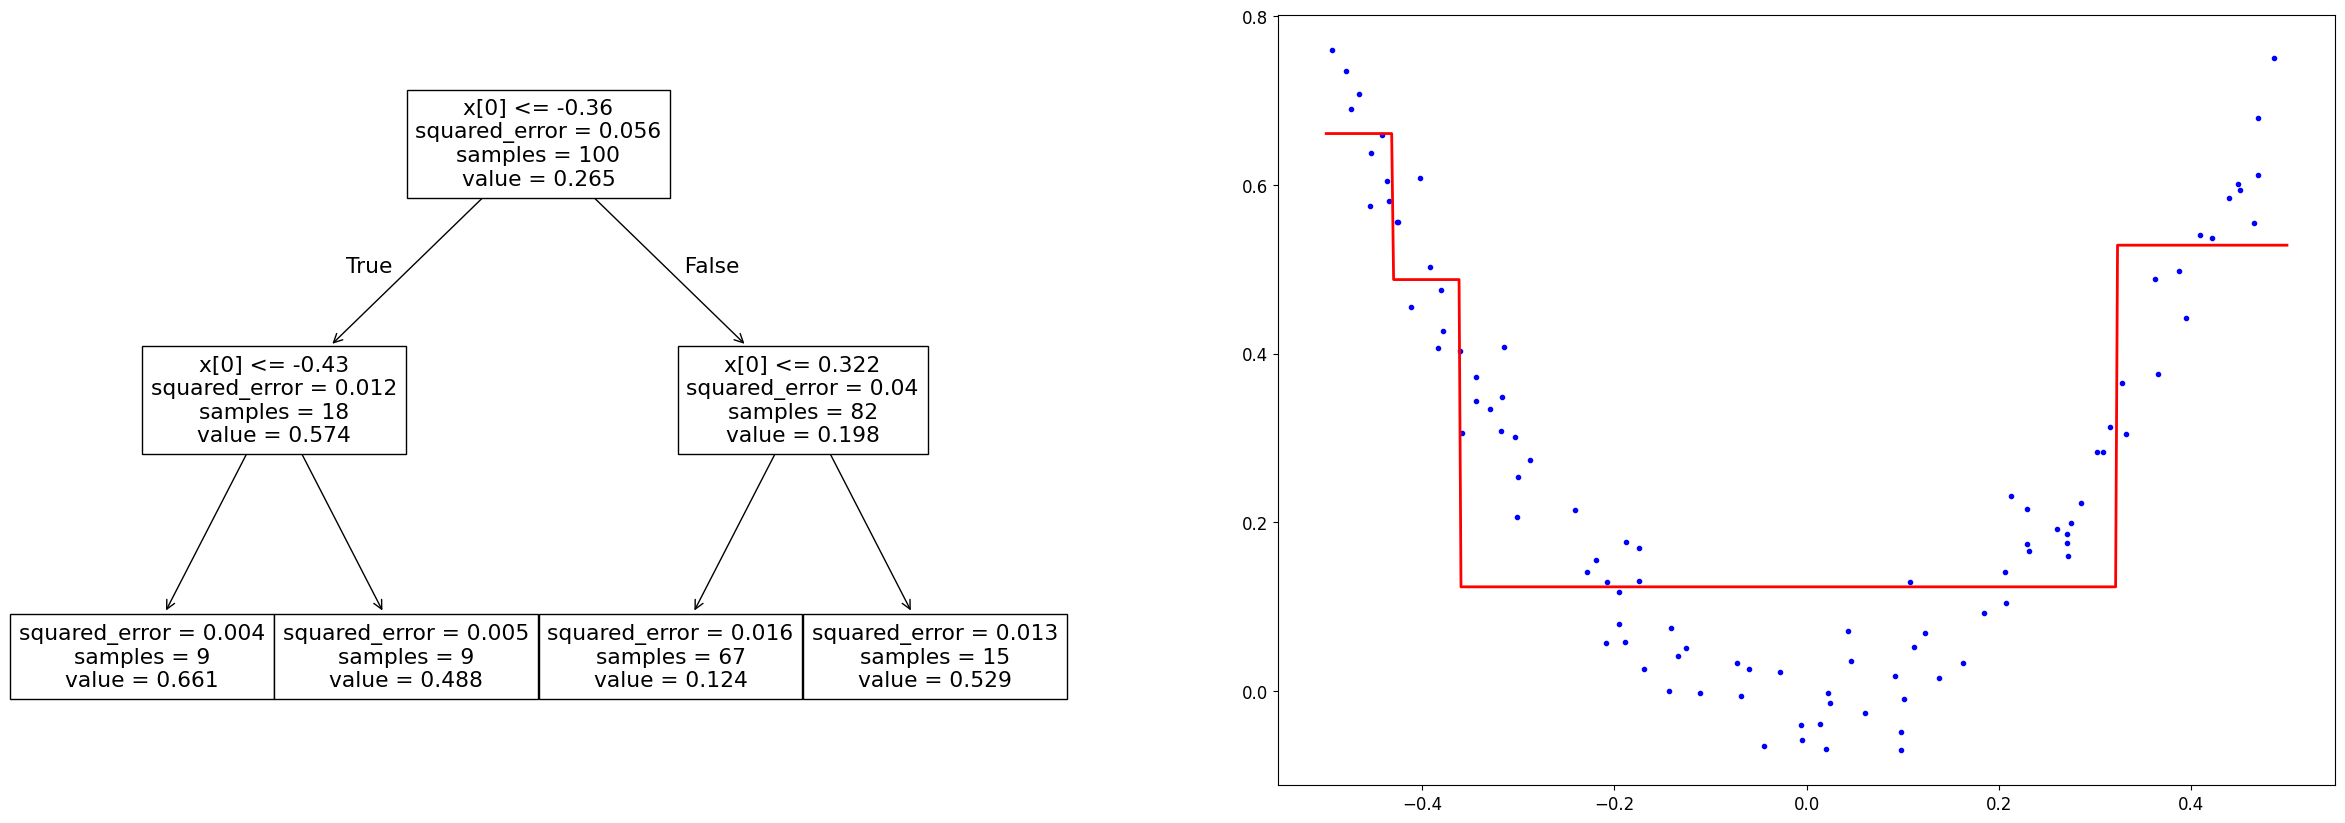

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_tree(tree_reg1)

plt.subplot(122)
plt.plot(X[:, 0], y, "b.", label="data")
plt.plot(x_test_reg, y_pred, "r-", linewidth=2, label="reg1")
plt.show()

In [25]:
#resíduos:
y2 = y - tree_reg1.predict(X)
# tree sucessora:
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [26]:
y_pred2=tree_reg2.predict(x_test_reg.reshape(-1,1))

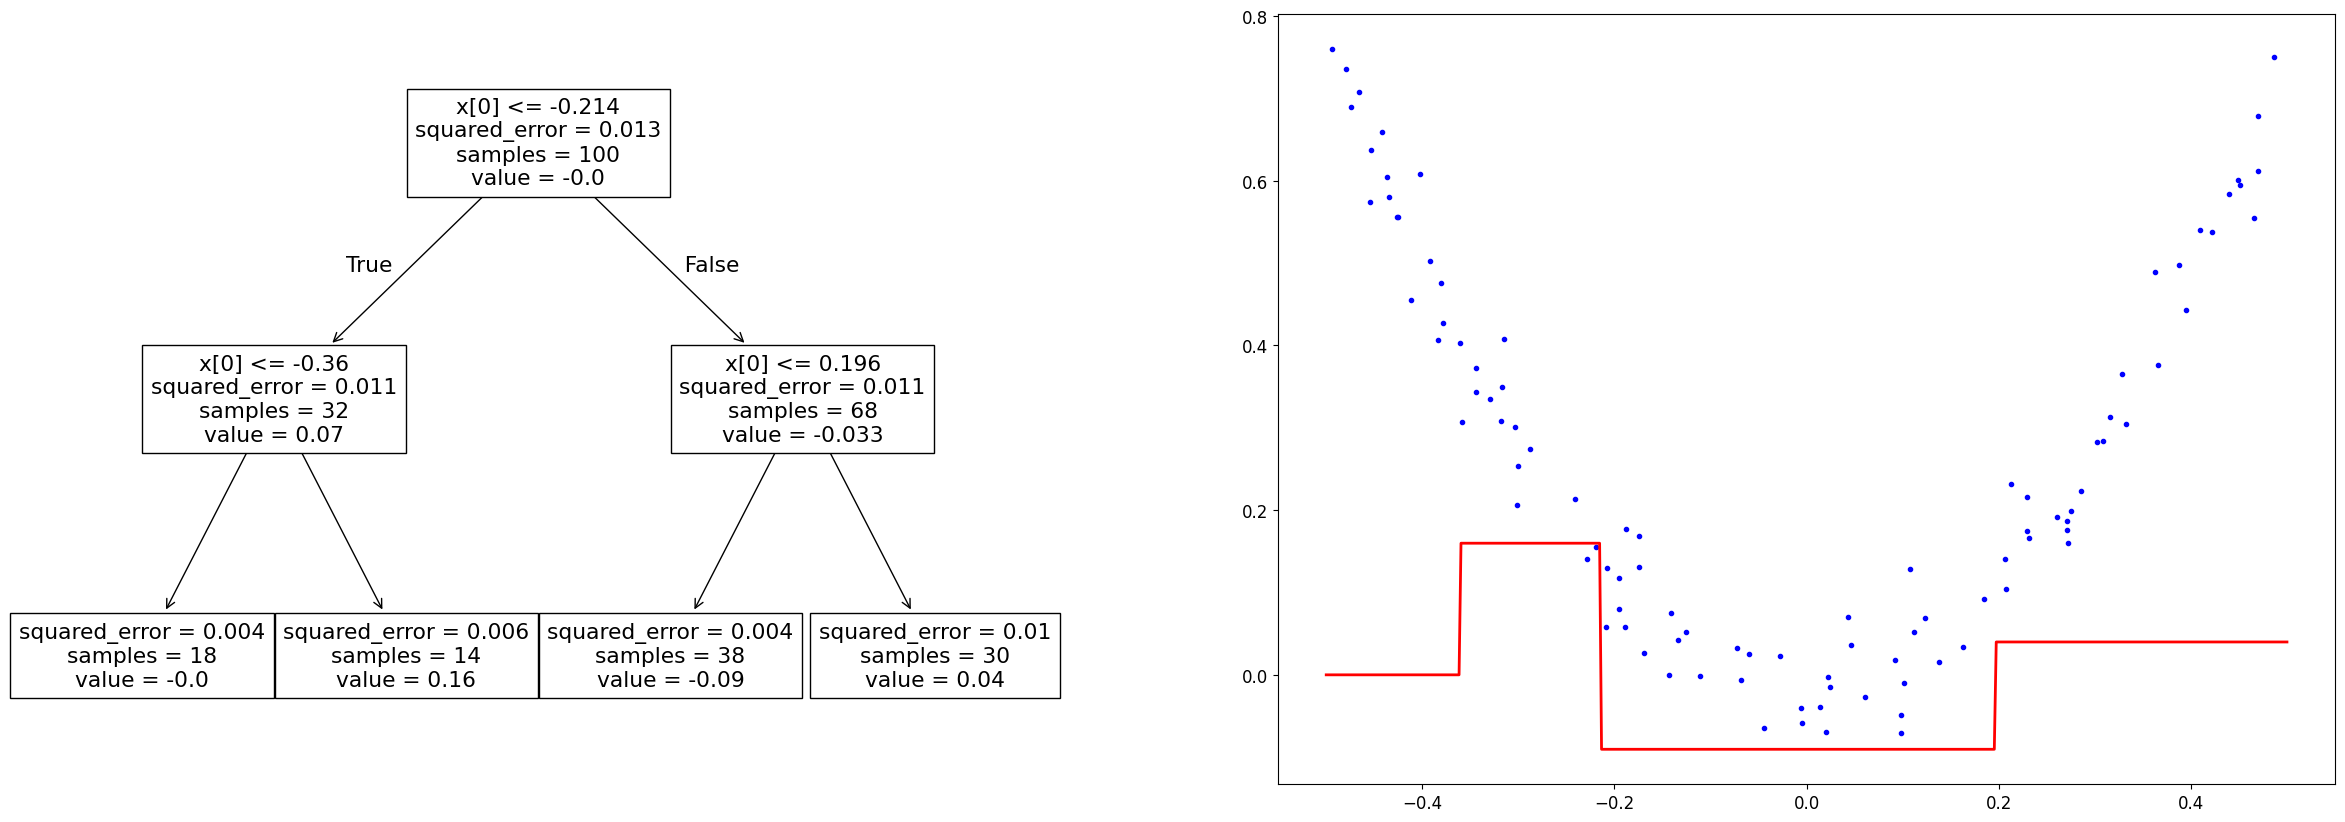

In [27]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_tree(tree_reg2)
plt.subplot(122)
plt.plot(X[:, 0], y, "b.", label="data")
plt.plot(x_test_reg, y_pred2, "r-", linewidth=2, label="reg2")
plt.show()

In [28]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [29]:
y_pred3=tree_reg3.predict(x_test_reg.reshape(-1,1))

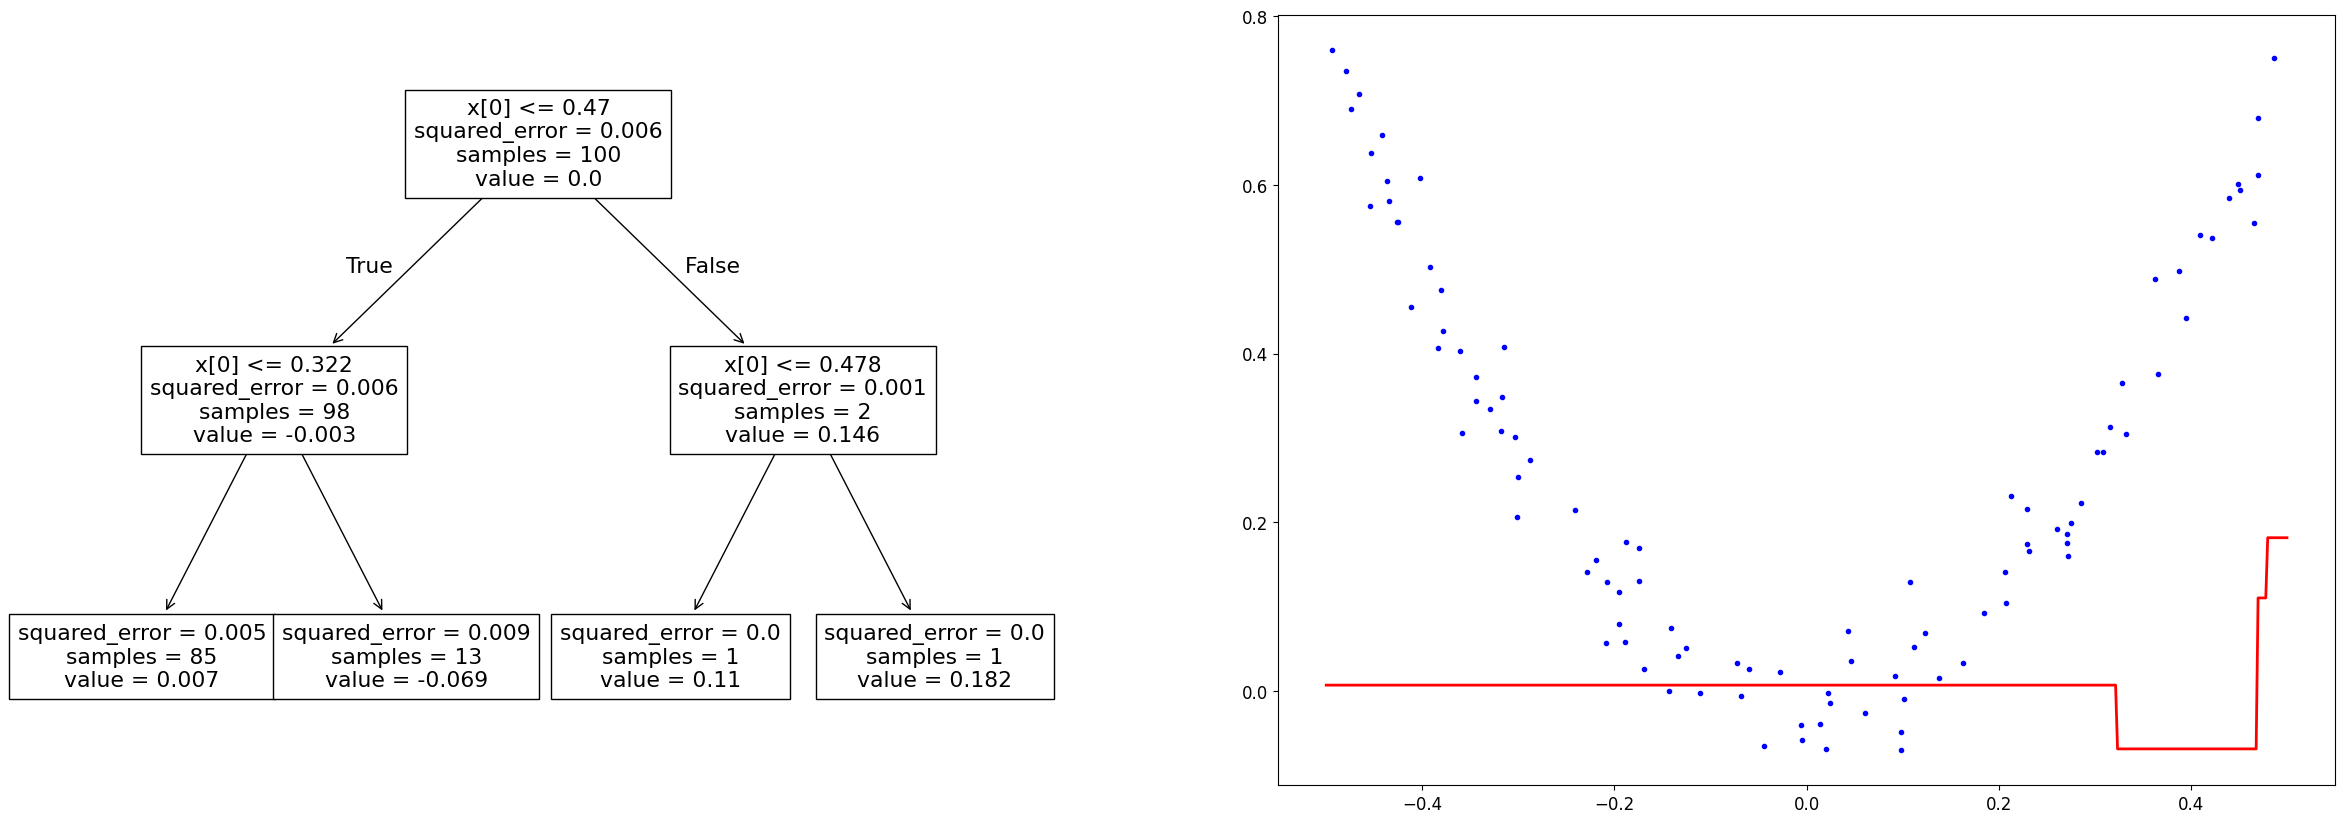

In [30]:
plt.figure(figsize=(30,10))
plt.subplot(121)
plot_tree(tree_reg3)
plt.subplot(122)
plt.plot(X[:, 0], y, "b.", label="data")
plt.plot(x_test_reg, y_pred3, "r-", linewidth=2, label="reg3")
plt.show()

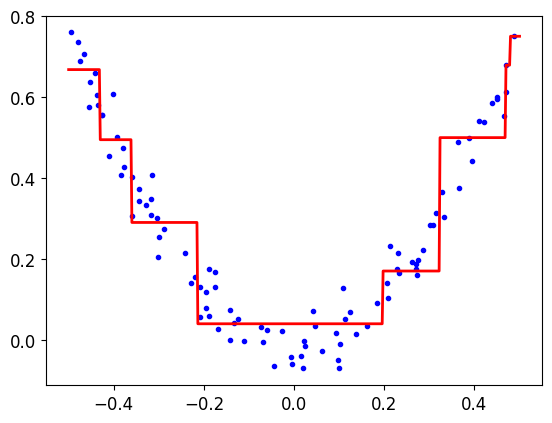

In [31]:
plt.plot(X[:, 0], y, "b.", label="data")
plt.plot(x_test_reg, y_pred3+y_pred2+y_pred , "r-", linewidth=2, label="ysum")
plt.show()

Treinamos nosso método de ensemble com 3 `Decision Trees`, ajustando as duas últimas aos erros residuais.

Vamos ver como nosso `Gradient Descent` prediz o valor de y para x=0.8

In [32]:
X_new = np.array([[0.8]])
# o gradient descent é a soma dos resultados das 3 Decision Trees
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

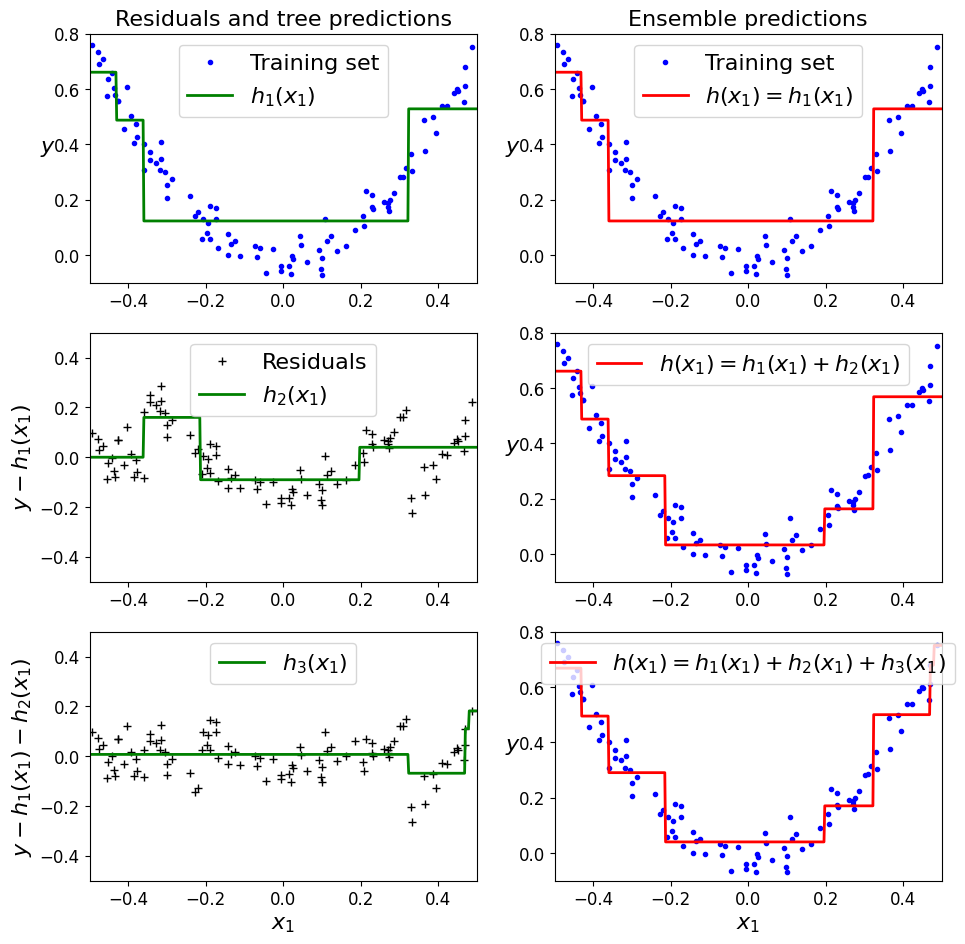

In [33]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

#save_fig("gradient_boosting_plot")
plt.show()

O `scikit-learn` tem uma classe que implementa o `GradientBoostingRegressor Tree` (GBRT).


### **Exercicio**:
Quantos estimadores (i.e., quantas iterações de treino sobre os resíduos) serão necessários para obter um valor de  $\chi^2  \leq 0.1$ ?

Lembre $\chi^2 = \sum_{data} \dfrac{\left(y-h(x_1)\right)^2}{h(x_1)^2}$


In [34]:
y4=y3-tree_reg3.predict(X)
np.sum(y4**2/(y4-y)**2)

np.float64(101.77851463815227)

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

O hyperparâmetro `learning_rate`, controla a contribuição de cada `Tree` do GBRT.

Quanto menor a `learning_rate`, maior o número de `Trees` (`n_estimators`) necessários. Mas em geral, as predições são melhores ==> técnica de ***shrinkage*** (encolhimento).

Vejamos dois exemplos de shrinkage, um com **underfitting** e outro com **overfitting**:

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)



GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [37]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

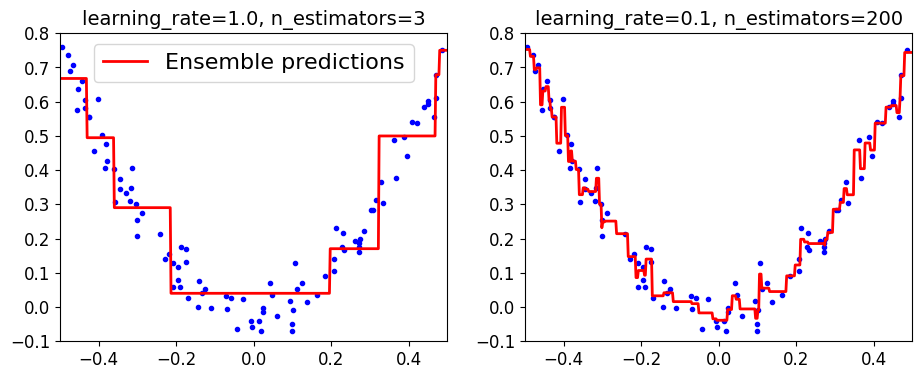

In [38]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

#save_fig("gbrt_learning_rate_plot")
plt.show()

### Gradient Boosting com `early stopping` (parada precoce)
Para encontrar o número ideal de `Trees` podemos usar a técnica de *early stopping*:
1. calcular o erro de validação a cada estágio do treinamento (com uma, duas, três, ... `Trees`)
2. encontrar o número ideal de `Trees`;
3. Treinar outro ensemble GBRT usando o número ideal de `Trees`.

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

#calculo do erro para cada estágio da validação
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]

# o número de Trees será igual ao estágio em que o erro é o menor
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=np.int64(56),
                          random_state=42)

In [40]:
min_error = np.min(errors)
print(min_error)

0.002712853325235463


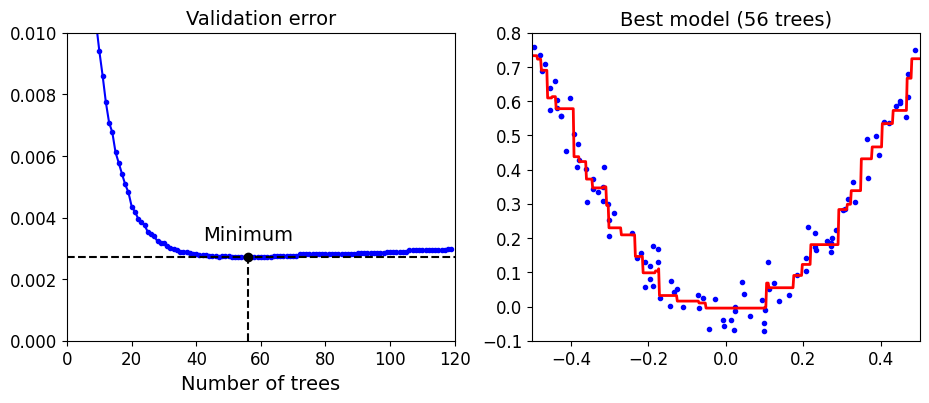

In [41]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

#save_fig("early_stopping_gbrt_plot")
plt.show()


“Também é possível implementar a parada precoce, interrompendo o treinamento mais cedo.

Você pode fazer isso configurando `warm_start = True`, o que faz o Scikit-Learn manter as árvores existentes quando o método fit () é chamado, permitindo treinamento incremental. O código a seguir interrompe o treinamento quando o erro de validação não melhora por cinco iterações seguidas. ”

In [42]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [43]:
print(gbrt.n_estimators)


61


In [44]:
print("Minimum validation MSE:", min_val_error)


Minimum validation MSE: 0.002712853325235463


## Ensemble Stacking

Uma outra forma de combinar diferentes classificadores é o stacking ou *stacked generalization* é usar um modelo para aprender como combiná-los da melhor maneira possível. Os classificadores individuais dão uma predição que um algoritmo que podemos chamar de _blender_ vai combinar para dar a predição final.

![stacking](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kn495g6dkXUmwi0yth1FUQ.png)

Vamos ver um exemplo com a classificação de números

In [45]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [46]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

Vamos combinar 4 classificadores : Random forest, extra trees, support vector machine e um multilevel perceptron

In [48]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [49]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)


Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


In [50]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9692, 0.9715, 0.0997, 0.9614]

In [51]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [52]:
X_val_predictions

array([[5., 5., 0., 5.],
       [8., 8., 0., 8.],
       [2., 2., 0., 2.],
       ...,
       [7., 7., 0., 7.],
       [6., 6., 0., 6.],
       [7., 7., 0., 7.]], dtype=float32)

Agora chamamos um classificador de random forest para combinar.

In [53]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

***OOB score*** : validar com instancias que não foram usadas em nenhum treinamento. [Vide esse exemplo no Medium.com](https://medium.com/data-science/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)

In [54]:
rnd_forest_blender.oob_score_

0.9694

In [55]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

y_pred = rnd_forest_blender.predict(X_test_predictions)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9684

Neste caso, não melhora muito em comparação com os melhores dos nossos classificadores individuais.

Mas pode-se tentar "sintonizar" alguns hiperparametros deste _blender_ (liquidificador 😅) ou testar outros algoritmos = (e.g., usar um MLPClassifier) para combinar e escolher o melhor usando _cross-validation_.



In [58]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes': [20, 50,100], 'learning_rate_init': [0.001, 0.01, 0.1], 'learning_rate':['constant','adaptive']}
gsearch_mlp_blender = GridSearchCV(MLPClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

In [59]:
gsearch_mlp_blender.fit(X_val_predictions,y_val)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [20, 50, 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             verbose=1)

In [60]:
gsearch_mlp_blender.best_estimator_

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.01, random_state=42)

In [61]:
y_pred_mlpblend = gsearch_mlp_blender.predict(X_test_predictions)

In [62]:
accuracy_score(y_test,y_pred_mlpblend)

0.9648

### **Exercicio**:

Experimente outras formas de combinar os classificadores.

Analise a performace usando outras pontuações (scores) e decida qual seria a melhor forma de combinar para maximizar a eficiência do sinal (recall).